### PROGETTO FINALE : ANALISI DATASET COVID 2019

#### Importo pandas per lavorare con il dataset 

In [1]:
import pandas as pd
from pandas import set_option

#### Imposto il formato di visualizzazione dei numeri decimali

In [2]:
set_option('display.float_format', '{:,.2f}'.format)

#### Procedo con la lettura del dataset relativo al covid 

In [3]:
dtypes = {"tests_units": object}
data = pd.read_csv("owid-covid-data.csv", dtype = dtypes )

#### Analizzo dimensioni del dataset e controllo intestazioni e le prime righe

In [4]:
data.shape

(311391, 67)

###### Da questo output si può notare che il dataset è composto da 311.391 righe e 67 colonne

In [5]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,"41,128,772.00",NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,"41,128,772.00",NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,"41,128,772.00",NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,"41,128,772.00",NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,"41,128,772.00",NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-01-08,NaN,0.00,0.00,NaN,0.00,0.00,...,NaN,37.75,0.50,64.83,0.51,"41,128,772.00",NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-01-09,NaN,0.00,0.00,NaN,0.00,0.00,...,NaN,37.75,0.50,64.83,0.51,"41,128,772.00",NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-01-10,NaN,0.00,0.00,NaN,0.00,0.00,...,NaN,37.75,0.50,64.83,0.51,"41,128,772.00",NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-01-11,NaN,0.00,0.00,NaN,0.00,0.00,...,NaN,37.75,0.50,64.83,0.51,"41,128,772.00",NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-01-12,NaN,0.00,0.00,NaN,0.00,0.00,...,NaN,37.75,0.50,64.83,0.51,"41,128,772.00",NaN,NaN,NaN,NaN


#### Numero dei casi totali per continente

In [7]:
g = data.groupby("continent")

In [8]:
g["new_cases"].sum()

continent
Africa           13,088,991.00
Asia            297,234,406.00
Europe          249,319,188.00
North America   124,175,560.00
Oceania          14,073,975.00
South America    68,568,119.00
Name: new_cases, dtype: float64

#### Importo la libreria numpy per creare un grafico sui casi covid nei vari continenti

In [9]:
import numpy as np
data.groupby(by = "continent",as_index = False, dropna = True).agg(casi_covid = ("new_cases",np.sum))

,continent,casi_covid
0,Africa,"13,088,991.00"
1,Asia,"297,234,406.00"
2,Europe,"249,319,188.00"
3,North America,"124,175,560.00"
4,Oceania,"14,073,975.00"
5,South America,"68,568,119.00"


<Axes: xlabel='continent'>

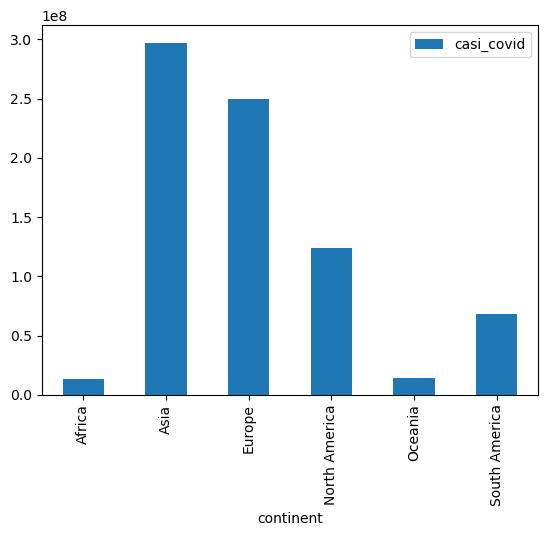

In [10]:
import numpy as np
data.groupby(by = "continent",as_index = False, dropna = True).agg(casi_covid = ("new_cases",np.sum)) \
       .plot(x = "continent",
             y = "casi_covid", 
             kind = "bar")

#### Totale mondiale infettati 

In [11]:
tot = str(g["new_cases"].sum().sum())

##### Realizzo un codice per visualizzare in modo più chiaro il numero totale di infettati

In [12]:
s = str.find(tot,'.')
if s >= 0:
   j = len(tot)
   tot = tot[0:s]
   b = ''
   k = 0
   for k in range(len(tot)-3,0,-3):
      b = '.' + tot[k:j] + b
      j = k
   b = tot[:k] + b
tot = b

print("Totale infettati =",b)

Totale infettati = 766.460.239


#### Implemento una funzione che mi permetta di confrontare i numeri relativi alla pandemia tra due continenti

In [13]:
def confronto_infetti(data, cont1, cont2):
    cond = data.loc[:, "continent"] == cont1
    cond1 = data.loc[:, "continent"] == cont2
    casi_covid = data.loc[cond, "total_cases"]
    casi_covid1 = data.loc[cond1,"total_cases"]
    
    minimo = casi_covid.min()
    minimo1 = casi_covid1.min()
   
    casi_covid_new = data.loc[cond, "new_cases"]
    casi_covid_new1 = data.loc[cond1, "new_cases"]
    mass = casi_covid_new.max()
    mass1 = casi_covid_new1.max()
    
    media = round(casi_covid_new.mean(),2)
    media1 = round(casi_covid_new1.mean(),2)
    
    tot_percentuale = round( casi_covid_new.sum() * 100 / g["new_cases"].sum().sum(),2)
    tot_percentuale1 = round( casi_covid_new1.sum() * 100 / g["new_cases"].sum().sum(),2)
    
    d = {"Continente":[cont1,cont2],"Minimo":[minimo,minimo1], "Massimo":[mass,mass1], "Media":[media,media1], "% Infetti": [tot_percentuale, tot_percentuale1]}
    
   
    return pd.DataFrame(d)

In [16]:
confronto_infetti(data,"Europe","North America")

,Continente,Minimo,Massimo,Media,% Infetti
0,Europe,1.00,"500,563.00","3,973.78",32.53
1,North America,1.00,"1,265,520.00","2,462.48",16.20


#### Come per i casi covid, realizzo una tabellina che evidenzia le vaccinazioni per ogni continente

In [19]:
data.groupby(by = "continent",as_index = False, dropna = True).agg(vaccinazioni = ("new_vaccinations",np.sum))

,continent,vaccinazioni
0,Africa,"117,367,074.00"
1,Asia,"7,547,787,134.00"
2,Europe,"1,264,676,627.00"
3,North America,"997,458,888.00"
4,Oceania,"74,542,164.00"
5,South America,"843,082,707.00"


#### Ora realizzo una funzione che sia in grado di relazionare i dati statistici dei vaccinati in tutti i continenti

In [21]:
def confronto_vacc(data, cont1, cont2, cont3, cont4, cont5, cont6):
    cond = data.loc[:, "continent"] == cont1
    cond1 = data.loc[:, "continent"] == cont2
    cond2 = data.loc[:, "continent"] == cont3
    cond3 = data.loc[:, "continent"] == cont4
    cond4 = data.loc[:, "continent"] == cont5
    cond5 = data.loc[:, "continent"] == cont6
    
    vaccini = data.loc[cond, "new_vaccinations"]
    vaccini1 = data.loc[cond1, "new_vaccinations"]
    vaccini2 = data.loc[cond2, "new_vaccinations"]
    vaccini3 = data.loc[cond3, "new_vaccinations"]
    vaccini4 = data.loc[cond4, "new_vaccinations"]
    vaccini5 = data.loc[cond5, "new_vaccinations"]
    
    minimo = vaccini.min()
    minimo1 = vaccini1.min()
    minimo2 = vaccini2.min()
    minimo3 = vaccini3.min()
    minimo4 = vaccini4.min()
    minimo5 = vaccini5.min()
   
    mass = vaccini.max()
    mass1 = vaccini1.max()
    mass2 = vaccini2.max()
    mass3 = vaccini3.max()
    mass4 = vaccini4.max()
    mass5 = vaccini5.max()
    
    media = round(vaccini.mean(),2)
    media1 = round(vaccini1.mean(),2)
    media2 = round(vaccini2.mean(),2)
    media3 = round(vaccini3.mean(),2)
    media4 = round(vaccini4.mean(),2)
    media5 = round(vaccini5.mean(),2)
    
    tot_percentuale = round( vaccini.sum() * 100 / g["new_vaccinations"].sum().sum(),2)
    tot_percentuale1 = round( vaccini1.sum() * 100 / g["new_vaccinations"].sum().sum(),2)
    tot_percentuale2 = round( vaccini2.sum() * 100 / g["new_vaccinations"].sum().sum(),2)
    tot_percentuale3 = round( vaccini3.sum() * 100 / g["new_vaccinations"].sum().sum(),2)
    tot_percentuale4 = round( vaccini4.sum() * 100 / g["new_vaccinations"].sum().sum(),2)
    tot_percentuale5 = round( vaccini5.sum() * 100 / g["new_vaccinations"].sum().sum(),2)
    
    d = {"Continente":[cont1,cont2,cont3, cont4, cont5, cont6],
         "Minimo":[minimo,minimo1,minimo2,minimo3,minimo4,minimo5], 
         "Massimo":[mass,mass1,mass2,mass3,mass4,mass5], 
         "Media":[media,media1,media2,media3,media4,media5], 
         "% Vaccinati": [tot_percentuale, tot_percentuale1,tot_percentuale2,tot_percentuale3,tot_percentuale4,tot_percentuale5]}
         
    
   
    return pd.DataFrame(d)

In [22]:
confronto_vacc(data, "Africa", "Asia", "Europe", "North America", "Oceania", "South America")

,Continente,Minimo,Massimo,Media,% Vaccinati
0,Africa,0.00,"1,866,822.00","42,203.19",1.08
1,Asia,0.00,"24,741,000.00","510,675.72",69.60
2,Europe,0.00,"2,389,472.00","59,991.30",11.66
3,North America,0.00,"7,246,123.00","174,046.22",9.20
4,Oceania,1.00,"351,226.00","56,859.01",0.69
5,South America,1.00,"3,976,605.00","150,846.79",7.77


#### Creo un grafico sulle vaccinazioni effettuate nei vari continenti

<Axes: xlabel='continent'>

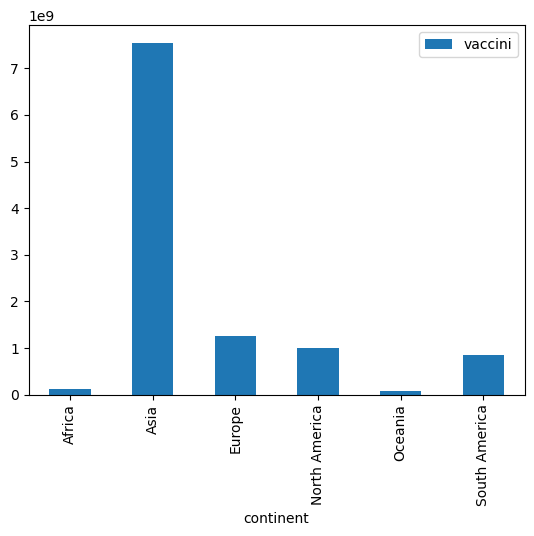

In [20]:
data.groupby(by = "continent",as_index = False, dropna = True).agg(vaccini = ("new_vaccinations",np.sum)) \
       .plot(x = "continent",
             y = "vaccini", 
             kind = "bar")

### Analisi statistica sui seguenti continenti:
* Europa
* Sud America
* Oceania

In [24]:
def cov_vacc(data, cont1, cont2, cont3):
    cond1 = data.loc[:, "continent"] == cont1
    cond2 = data.loc[:, "continent"] == cont2
    cond3 = data.loc[:, "continent"] == cont3
    
    vaccini1 = data.loc[cond1, "new_vaccinations"]
    vaccini2 = data.loc[cond2, "new_vaccinations"]
    vaccini3 = data.loc[cond3, "new_vaccinations"]
    
    casi_covid1 = data.loc[cond1, "new_cases"]
    casi_covid2 = data.loc[cond2, "new_cases"]
    casi_covid3 = data.loc[cond3, "new_cases"]
    
    mass_vacc1 = vaccini1.max()
    mass_vacc2 = vaccini2.max()
    mass_vacc3 = vaccini3.max()
    mass_cov1 = casi_covid1.max()
    mass_cov2 = casi_covid2.max()
    mass_cov3 = casi_covid3.max()
    
    media_vacc1 = round(vaccini1.mean(),2)
    media_vacc2 = round(vaccini2.mean(),2)
    media_vacc3 = round(vaccini3.mean(),2)
    media_cov1 = round(casi_covid1.mean(),2)
    media_cov2 = round(casi_covid2.mean(),2)
    media_cov3 = round(casi_covid3.mean(),2)
    
    tot_perc_vacc1 = round( vaccini1.sum() * 100 / g["new_vaccinations"].sum().sum(),2)
    tot_perc_vacc2 = round( vaccini2.sum() * 100 / g["new_vaccinations"].sum().sum(),2)
    tot_perc_vacc3 = round( vaccini3.sum() * 100 / g["new_vaccinations"].sum().sum(),2)
    tot_perc_cov1 = round( casi_covid1.sum() * 100 / g["new_cases"].sum().sum(),2)
    tot_perc_cov2 = round( casi_covid2.sum() * 100 / g["new_cases"].sum().sum(),2)
    tot_perc_cov3 = round( casi_covid3.sum() * 100 / g["new_cases"].sum().sum(),2)
    
    d = {"Continente":[cont1,cont2,cont3],
         "Massimo Covid":[mass_cov1,mass_cov2,mass_cov3], 
         "Massimo Vaccini":[mass_vacc1,mass_vacc2,mass_vacc3], 
         "Media covid":[media_cov1,media_cov2,media_cov3],
         "Media Vaccini":[media_vacc1,media_vacc2,media_vacc3],
         "% infetti":[tot_perc_cov1,tot_perc_cov2,tot_perc_cov3],
         "% Vaccinati": [tot_perc_vacc1,tot_perc_vacc2,tot_perc_vacc3]}
    
    return pd.DataFrame(d)

In [26]:
cov_vacc(data, "Europe", "South America", "Oceania")

,Continente,Massimo Covid,Massimo Vaccini,Media covid,Media Vaccini,% infetti,% Vaccinati
0,Europe,"500,563.00","2,389,472.00","3,973.78","59,991.30",32.53,11.66
1,South America,"298,408.00","3,976,605.00","3,983.28","150,846.79",8.95,7.77
2,Oceania,"588,813.00","351,226.00",476.44,"56,859.01",1.84,0.69


#### Dai dati relativi ai continenti sopracitati si evince che il Sud America vanta una media di vaccinati molto più alta rispetto all'Europa nonostante la media degli infettati sia quasi la stessa, questo perchè il numero di vaccinati in Sud America è molto basso. Per quanto concerne innvece l'Oceania, si registrano numeri veramente esigui, anche se il massimo di contagiati è molto simile a quello europeo.

## Analisi complessiva

#### Dalle varie analisi effettuate si denota che il continente con più casi di covid registrati risulta essere l'Asia, d' altronde è altresì vero che la nazione dal quale è partita l'epidemia è la Cina. Stesso discorso vale per le vaccinazioni. Singolari invece sono le situazioni dell'Africa e dell' Oceania, che protocollano dei numeri pandemici molto al di sotto della media mondiale. Altrettanto particolare è il rapporto tra infettati e vaccinati in Europa. Dato il numero di contagiati ci si aspetterebbe un elevato numero di vaccinazioni, invece quest'ultime superano di poco quelle del Nord America, che ha avuto un numero molto minore di infettati rispetto all Europa.